# Model založený na Machine Learning Technikách

Model bude mít stejný cíl jako ručně vytvořený model na ratios. Znamená to tedy, že jsou vzaty vypočtené ukazatele pro rok 2016, upraveny pro potřeby ML a následně na data vyzkoušeno několik ML algoritmů

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 150)

In [15]:
data = pd.read_csv('stat2016.csv')
data.set_index('ticker_id', inplace=True, drop=True)
price_change = pd.read_csv('price_change.csv')

In [16]:
data.shape
data.info()

(11470, 37)

<class 'pandas.core.frame.DataFrame'>
Index: 11470 entries, INTP.JK to AAPL
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   currentRatio                  11308 non-null  float64
 1   quickRatio                    8554 non-null   float64
 2   cashRatio                     11234 non-null  float64
 3   totalDebtRatio                11309 non-null  float64
 4   debtEquityRatio               6575 non-null   float64
 5   equityMultiplier              11317 non-null  float64
 6   timesInterestEarnedRatio      9569 non-null   float64
 7   cashCoverageRatio             9349 non-null   float64
 8   inventoryTurnover             7964 non-null   float64
 9   daysSalesInInventory          7964 non-null   float64
 10  receivablesTurnover           10557 non-null  float64
 11  daysSalesInReceivables        10557 non-null  float64
 12  totalAssetTurnover            11076 non-null  float64
 13  d

In [17]:
data.drop(['debtEquityRatio', 'payoutRatio', 'enterpriseToEbitda', 'heldPercentInstitutions', 'heldPercentInsiders',
          'shortPercentOfFloat', 'bookValue','marketCap', 'enterpriseValue'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11470 entries, INTP.JK to AAPL
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   currentRatio                  11308 non-null  float64
 1   quickRatio                    8554 non-null   float64
 2   cashRatio                     11234 non-null  float64
 3   totalDebtRatio                11309 non-null  float64
 4   equityMultiplier              11317 non-null  float64
 5   timesInterestEarnedRatio      9569 non-null   float64
 6   cashCoverageRatio             9349 non-null   float64
 7   inventoryTurnover             7964 non-null   float64
 8   daysSalesInInventory          7964 non-null   float64
 9   receivablesTurnover           10557 non-null  float64
 10  daysSalesInReceivables        10557 non-null  float64
 11  totalAssetTurnover            11076 non-null  float64
 12  daysSalesInTotalAssets        11076 non-null  float64
 13  c

Využity jsou pouze sloupce, které mají více jak 8000 hodnot. Nulové hodnoty doplněny mediánem v rámci sektoru, do kterého společnost spadá

In [18]:
median = data.groupby('sector').median()
for sector in data['sector'].unique():
    for col in data.columns[:26]:
        data.loc[data['sector'] == sector, col] = data.loc[data['sector'] == sector, col].fillna(median.loc[sector, col])#nefunguje mi inplace v fillna

In [19]:
data.describe()

,currentRatio,quickRatio,cashRatio,totalDebtRatio,equityMultiplier,timesInterestEarnedRatio,cashCoverageRatio,inventoryTurnover,daysSalesInInventory,receivablesTurnover,daysSalesInReceivables,totalAssetTurnover,daysSalesInTotalAssets,capitalIntensity,ROA,ROE,market-bookRatio,cashSharesRatio,currentSharesRatio,assetSharesRatio,trailingPE,priceToSalesTrailing12Months,enterpriseToRevenue,profitMargins,trailingEps,priceToBook
count,11470.000000,11470.000000,11470.000000,11470.000000,1.147000e+04,1.147000e+04,1.147000e+04,11470.000000,11470.000000,11470.000000,1.147000e+04,11470.000000,1.147000e+04,11470.000000,11470.000000,11470.000000,1.147000e+04,1.147000e+04,1.147000e+04,1.147000e+04,1.147000e+04,11470.000000,1.147000e+04,11470.000000,11470.000000,1.147000e+04
mean,3.166016,1.431984,0.993427,8.695325,2.435218e+04,5.123362e+02,7.134919e+02,47.608586,152.549900,24.259286,6.068539e+02,0.713084,2.653369e+04,72.695041,-0.083502,0.093986,-2.211509e+12,1.231749e+03,7.486860e+03,5.333196e+04,-3.506445e+02,34.926562,4.891176e+03,-2.827729,-10.673376,-4.802747e+01
std,18.650586,2.247553,5.625812,106.032201,2.607655e+06,3.326740e+04,3.539446e+04,833.780200,1269.769402,524.196136,3.348579e+04,1.041947,2.203740e+06,6037.644512,6.021376,2.592990,2.401523e+14,1.992651e+04,1.096001e+05,3.797225e+06,2.679575e+04,3408.144457,5.216434e+05,114.624303,626.111948,1.723547e+04
min,-0.782258,0.000000,-0.612903,-24.602273,-3.707801e+02,-5.406755e+05,-5.366887e+05,-17.237274,-1990.996068,-0.785714,-5.851214e+03,-0.180030,-2.523451e+05,-691.356545,-563.987805,-127.313433,-2.571952e+16,-4.258774e-07,1.822166e-05,1.822166e-05,-2.048050e+06,-91.267964,-1.207442e+03,-9704.666667,-50660.792952,-1.655309e+06
25%,0.934241,0.567128,0.106057,1.221810,1.541899e+00,2.721594e+00,5.025335e+00,3.321805,39.271195,3.822109,3.981995e+01,0.237344,3.784146e+02,1.036752,0.005529,0.027084,3.160640e+07,1.187839e+00,5.322659e+00,2.079798e+01,2.571076e+00,0.001542,7.161569e-01,0.017435,0.001607,6.228641e-01
50%,1.480629,1.038994,0.299886,1.787755,2.214903e+00,8.907161e+00,1.156962e+01,6.407047,56.968519,5.554246,6.568897e+01,0.560149,6.504415e+02,1.782031,0.029352,0.089694,2.154744e+08,4.963313e+00,2.300695e+01,8.540187e+01,1.130994e+01,0.030848,1.668581e+00,0.062078,0.107671,1.450756e+00
75%,2.486292,1.565040,0.758375,3.243364,3.810059e+00,1.845455e+01,2.537143e+01,9.263586,109.849970,9.166260,9.530186e+01,0.963169,1.532739e+03,4.199285,0.066818,0.155062,1.755787e+09,8.068321e+01,4.965483e+02,1.246531e+03,2.801644e+01,0.124347,4.039168e+00,0.148975,0.615314,4.252785e+00
max,1348.252490,76.276516,471.471429,6181.101421,2.792749e+08,3.414930e+06,3.469741e+06,39998.574437,110614.058065,51314.096185,3.508718e+06,74.899343,2.350594e+08,643998.366776,24.586291,98.294428,9.633138e+13,9.008431e+05,3.934385e+06,4.056481e+08,1.982973e+05,364911.339244,5.586698e+07,59.374251,3476.867771,8.100656e+05


Dále je smazán sloupec industry, který obsahuje nečíselné hodnoty a jejich počet je příliš velký rpo použití na dummy sloupce. Dummy sloupec je vytvořen ze sloupce sector, který je nejprve převeden na číselné hodnoty, následně na dummy sloupce

In [20]:
data.drop('industry', inplace=True, axis=1)

In [21]:
mapa = {
    'Real Estate': 0, 
    'Communication Services': 1, 
    'Basic Materials': 2,
    'Others': 3, 
    'Healthcare': 4, 
    'Technology': 5, 
    'Industrials': 6,
    'Consumer Cyclical': 7, 
    'Financial Services': 8, 
    'Consumer Defensive': 9,
    'Energy': 10, 
    'Utilities': 11
}
data.replace({'sector':mapa}, inplace=True)

In [22]:
data = data.merge(pd.get_dummies(data['sector'], prefix='sec', drop_first=True), how='left', on='ticker_id')
data.drop('sector', axis=1, inplace=True)

In [23]:
data

,currentRatio,quickRatio,cashRatio,totalDebtRatio,equityMultiplier,timesInterestEarnedRatio,cashCoverageRatio,inventoryTurnover,daysSalesInInventory,receivablesTurnover,daysSalesInReceivables,totalAssetTurnover,daysSalesInTotalAssets,capitalIntensity,ROA,ROE,market-bookRatio,cashSharesRatio,currentSharesRatio,assetSharesRatio,trailingPE,priceToSalesTrailing12Months,enterpriseToRevenue,profitMargins,trailingEps,priceToBook,sec_1,sec_2,sec_3,sec_4,sec_5,sec_6,sec_7,sec_8,sec_9,sec_10,sec_11
ticker_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INTP.JK,4.525028,3.966510,3.034759,1.258533,1.153484,490.151450,624.855800,5.077190,71.890166,5.714773,63.869548,0.509506,716.380526,1.962686,0.128366,0.148069,6.195406e+09,2627.934142,3918.424548,8190.354854,11.366169,0.000240,1.095564,0.251943,0.000951,1.682972,0,1,0,0,0,0,0,0,0,0,0
SAP.BD,1.195245,1.289671,0.382636,1.850233,1.678685,23.247748,28.959459,6.134285,59.501636,3.101209,117.696038,0.498272,732.531275,2.006935,0.082255,0.138080,1.889182e+12,3.100503,9.685092,37.082915,11467.907743,0.054120,1893.240504,0.165080,0.327842,1582.229799,0,0,1,0,0,0,0,0,0,0,0
207940.KS,0.590106,0.523796,0.093008,1.393327,1.845251,-1.580038,1.325277,1.638635,222.746347,3.895529,93.697169,0.039111,9332.469003,25.568408,-0.023473,-0.043314,4.970419e+08,3481.260500,22087.586730,113851.977722,-173.435619,0.000225,101.508037,-0.600170,-0.000374,7.512158,0,0,0,1,0,0,0,0,0,0,0
MSFT.MX,2.352882,2.314959,0.109675,2.046448,2.687168,21.872888,26.601770,14.562417,25.064521,4.987361,73.184995,0.471158,774.687013,2.122430,0.106162,0.285276,3.081551e+12,0.855898,18.361699,25.436067,1420.186073,0.083442,319.203960,0.225322,0.370322,405.144683,0,0,0,0,1,0,0,0,0,0,0
TCPI.JK,0.984183,0.980440,0.008216,2.111683,3.191461,1.905101,3.188409,277.015251,1.317617,1.522321,239.765438,0.442235,825.353755,2.261243,0.049379,0.157591,5.152523e+11,0.403000,48.273800,150.841200,647.118844,0.014991,72.822841,0.111658,0.134257,103.050465,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZIXI,1.000066,1.680605,0.867642,1.091660,1.678378,282.303030,352.090909,5.846553,62.429952,49.217676,7.416035,0.730275,499.811619,1.369347,0.070874,0.118953,2.233526e+08,0.475487,0.548058,1.480144,33.745473,0.925145,2.057821,0.097050,9.532619,4.014109,0,0,0,0,1,0,0,0,0,0,0
ZUMZ,2.871897,1.419066,0.275106,1.625501,1.389616,11.925060,17.352659,5.249205,69.534338,66.698676,5.472372,1.959928,186.231322,0.510223,0.060710,0.084364,3.150207e+07,0.783917,8.183483,16.520172,14.457458,0.030885,0.716157,0.030976,0.997066,1.219687,0,0,0,0,0,0,1,0,0,0,0
ZYXI,0.441833,0.428018,0.031892,1.007618,-1.101804,1.818182,2.940341,32.869159,11.104635,4.396631,83.018103,3.254217,112.162172,0.307294,0.016866,-0.018583,-3.017453e+09,0.007515,0.104116,0.124470,5058.706174,2.468812,4.039168,0.005183,476.337681,-91.807135,0,0,0,1,0,0,0,0,0,0,0


## Následující postup
Vývoj ML modelů je iterativní proces. Nejdříve je připravena cílová proměnná (target variable) a následně v jednotlivých iteracích optimalizován model v následujících oblastech:
* Normalize tak, aby všechny sloupce měly stejnou hodnotu mean a std
* Hyperparameter tunning
* Výběr nejdůležitějších atributů pro model

In [24]:
price_change = price_change[(price_change['price_change'] > price_change['price_change'].describe(percentiles=[0.05]).loc['5%']) & (price_change['price_change'] < price_change['price_change'].describe(percentiles=[0.95]).loc['95%'])]

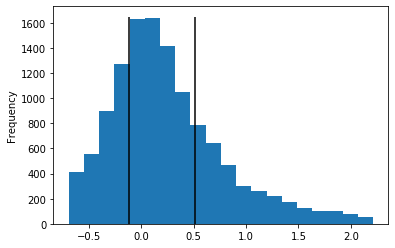

In [25]:
price_change['price_change'].plot.hist(bins = 20)
plt.vlines(price_change.describe().loc['25%', 'price_change'], 0, 1650)
plt.vlines(price_change.describe().loc['75%', 'price_change'], 0, 1650)

In [26]:
price_75 = price_change['price_change'].describe().loc['75%']
price_25 = price_change['price_change'].describe().loc['25%']

price_change.loc[price_change['price_change'] > price_75, 'price_sym'] = 1
price_change.loc[(price_change['price_change'] >= price_25) & (price_change['price_change'] <= price_75), 'price_sym'] = 0
price_change.loc[price_change['price_change'] < price_25, 'price_sym'] = -1

price_change.set_index('ticker_id', inplace=True)

In [27]:
data = data.merge(price_change[['price_change','price_sym']], how='inner', on='ticker_id')

# Machine learning 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## 1. iterace
Základní běh

In [29]:
features = data.iloc[:,:37]
target = data['price_sym']

In [30]:
train_x, test_x, train_y, test_y = train_test_split(features, target, random_state=1)
results = pd.DataFrame()

In [31]:
model = LogisticRegression(max_iter=10000, random_state=1)
model.fit(train_x, train_y)
results.loc['Logistic Regression', '1. iter'] = model.score(test_x, test_y)
model = DecisionTreeClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Decision Tree', '1. iter'] = model.score(test_x, test_y)
model = RandomForestClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Random Forest', '1. iter'] = model.score(test_x, test_y)
model = ExtraTreesClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Extra Trees', '1. iter'] = model.score(test_x, test_y)
model = GradientBoostingClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Gradient Boosting', '1. iter'] = model.score(test_x, test_y)
model = KNeighborsClassifier()
model.fit(train_x, train_y)
results.loc['KNeighbors', '1. iter'] = model.score(test_x, test_y)
model = SVC(random_state=1)
model.fit(train_x, train_y)
results.loc['SVM', '1. iter'] = model.score(test_x, test_y)

c:\users\uzivatel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
results

,1. iter
Logistic Regression,0.256778
Decision Tree,0.519936
Random Forest,0.596890
Extra Trees,0.574960
Gradient Boosting,0.564992
KNeighbors,0.437400
SVM,0.501595


## 2. iterace
Normalizace

In [33]:
scaler = StandardScaler()
scaler.fit(data.iloc[:,:37])
data_scaled = pd.DataFrame(scaler.transform(data.iloc[:,:37]), index=data.index, columns=data.columns[:37])
features = data_scaled
target = data['price_sym']
train_x, test_x, train_y, test_y = train_test_split(features, target, random_state=1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
model = LogisticRegression(max_iter=1000,random_state=1)
model.fit(train_x, train_y)
results.loc['Logistic Regression', '2. iter'] = model.score(test_x, test_y)
model = DecisionTreeClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Decision Tree', '2. iter'] = model.score(test_x, test_y)
model = RandomForestClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Random Forest', '2. iter'] = model.score(test_x, test_y)
model = ExtraTreesClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Extra Trees', '2. iter'] = model.score(test_x, test_y)
model = GradientBoostingClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Gradient Boosting', '2. iter'] = model.score(test_x, test_y)
model = KNeighborsClassifier()
model.fit(train_x, train_y)
results.loc['KNeighbors', '2. iter'] = model.score(test_x, test_y)
model = SVC(random_state=1)
model.fit(train_x, train_y)
results.loc['SVM', '2. iter'] = model.score(test_x, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
results

,1. iter,2. iter
Logistic Regression,0.256778,0.497608
Decision Tree,0.519936,0.519936
Random Forest,0.596890,0.591707
Extra Trees,0.574960,0.580144
Gradient Boosting,0.564992,0.564593
KNeighbors,0.437400,0.516348
SVM,0.501595,0.499601


## 3. iterace
Výběr nejdůležitějších atributů

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

In [37]:
f_select = SelectKBest(f_classif, k=20)
f_select.fit(features, target)
features = pd.DataFrame(f_select.transform(features), index=features.index, columns=features.columns[f_select.get_support()])
train_x, test_x, train_y, test_y = train_test_split(features, target, random_state=1)

SelectKBest(k=20, score_func=<function f_classif at 0x14E13A08>)

In [38]:
model = LogisticRegression(max_iter= 1000, random_state=1)
model.fit(train_x, train_y)
results.loc['Logistic Regression', '3. iter'] = model.score(test_x, test_y)
model = DecisionTreeClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Decision Tree', '3. iter'] = model.score(test_x, test_y)
model = RandomForestClassifier(random_state=1)
model.fit(train_x, train_y)
model.feature_importances_
results.loc['Random Forest', '3. iter'] = model.score(test_x, test_y)
model = ExtraTreesClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Extra Trees', '3. iter'] = model.score(test_x, test_y)
model = GradientBoostingClassifier(random_state=1)
model.fit(train_x, train_y)
results.loc['Gradient Boosting', '3. iter'] = model.score(test_x, test_y)
model = KNeighborsClassifier()
model.fit(train_x, train_y)
results.loc['KNeighbors', '3. iter'] = model.score(test_x, test_y)
model = SVC(random_state=1)
model.fit(train_x, train_y)
results.loc['SVM', '3. iter'] = model.score(test_x, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

array([0.0836174 , 0.09581732, 0.09789725, 0.06967761, 0.06777924,
       0.10025338, 0.10571462, 0.10550976, 0.10747854, 0.10372525,
       0.00469086, 0.00655697, 0.00616164, 0.00924747, 0.00868019,
       0.00767448, 0.00507956, 0.00656532, 0.00512125, 0.00275191])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
results

,1. iter,2. iter,3. iter
Logistic Regression,0.256778,0.497608,0.500399
Decision Tree,0.519936,0.519936,0.513955
Random Forest,0.596890,0.591707,0.570574
Extra Trees,0.574960,0.580144,0.564195
Gradient Boosting,0.564992,0.564593,0.520335
KNeighbors,0.437400,0.516348,0.509569
SVM,0.501595,0.499601,0.501994


Výsledky se nezlepšili, ale zkusím využít menšího počtu features k použití gridsearchCV, jelikož na plném počtu features nebyl výsledek dopočítán
## 4 iteraca
Výsledky 3. iterace je většinou horší, než výsledky 2. iterace. To je z důvodu, že je k dispozici menší množství informace, jelikož byly vybrány pouze atributy s největším vlivem na výsledek.

Posledním pokusem je použití metody GrdiSearchCV, která umožňuje hyperparametr tunning. Použit bude již pouze algoritmus RandomForestClassifier, jelikož dosahuje nejelpších výsledků.

In [40]:
# define grid
parametergrid= {"criterion" : ("gini", "entropy"),"max_depth":(15, 17, 20),"min_samples_leaf":(1,3,6,10)
}
# random_state ensures replicability
clf = GridSearchCV(RandomForestClassifier(random_state=0), parametergrid)
#this may take a while
clf.fit(train_x, train_y)
# returns the best model
clf.best_estimator_
# the best parameters
clf.best_params_
# results obtained by the best model
clf.best_score_ 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 3}

0.5676108008765108

## Závěr
Výsledek napovídá, že není možné na principech fundamentální analýzy předpovídat vývoj hodnoty akcie 4 roky do budoucnost. Toto je poměrně očekávaný závěr. 
